In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a70ee93bdb27cfe4d95333040f6a202a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | kimbe
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ashcroft
Processing Record 10 of Set 1 | bandundu
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | port-gentil
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | port augusta
Processing Record 18 of Set 1 | shimoda
Processing Record 19 of Set 1 | nizwa
Processing Record 20 of Set 1 | sambava
Processing Record 21 of Set 1 | coahuayana
Processing Record

Processing Record 38 of Set 4 | iquitos
Processing Record 39 of Set 4 | morros
Processing Record 40 of Set 4 | san policarpo
Processing Record 41 of Set 4 | teknaf
Processing Record 42 of Set 4 | hof
Processing Record 43 of Set 4 | khash
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | dubai
Processing Record 46 of Set 4 | mandiana
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | tairua
Processing Record 49 of Set 4 | lincoln
Processing Record 50 of Set 4 | itacare
Processing Record 1 of Set 5 | ascension
Processing Record 2 of Set 5 | colquechaca
Processing Record 3 of Set 5 | ye
City not found. Skipping...
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | lasa
Processing Record 6 of Set 5 | tuatapere
Processing Record 7 of Set 5 | isiro
Processing Record 8 of Set 5 | dikson
Processing Record 9 of Set 5 | port hedland
Processing Record 10 of Set 5 | shumskiy
Processing Record 11 of S

Processing Record 26 of Set 8 | sao jose da coroa grande
Processing Record 27 of Set 8 | comodoro rivadavia
Processing Record 28 of Set 8 | lagoa
Processing Record 29 of Set 8 | miri
Processing Record 30 of Set 8 | ciras
City not found. Skipping...
Processing Record 31 of Set 8 | kamenka
Processing Record 32 of Set 8 | north augusta
Processing Record 33 of Set 8 | cam pha
City not found. Skipping...
Processing Record 34 of Set 8 | ust-kulom
Processing Record 35 of Set 8 | kampar
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | clyde river
Processing Record 38 of Set 8 | laguna
Processing Record 39 of Set 8 | hargeysa
Processing Record 40 of Set 8 | emmauss
Processing Record 41 of Set 8 | arraial do cabo
Processing Record 42 of Set 8 | malwan
City not found. Skipping...
Processing Record 43 of Set 8 | itoman
Processing Record 44 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 45 of Set 8 | taltal
Processing Record 46 of Set 8 | dhandhuka
Processi

Processing Record 12 of Set 12 | matamoros
Processing Record 13 of Set 12 | piranshahr
Processing Record 14 of Set 12 | sakaiminato
Processing Record 15 of Set 12 | ternate
Processing Record 16 of Set 12 | fujin
Processing Record 17 of Set 12 | san jeronimo
Processing Record 18 of Set 12 | cullman
Processing Record 19 of Set 12 | yining
Processing Record 20 of Set 12 | jumla
Processing Record 21 of Set 12 | novaci
Processing Record 22 of Set 12 | port shepstone
Processing Record 23 of Set 12 | brigantine
Processing Record 24 of Set 12 | antofagasta
Processing Record 25 of Set 12 | vostok
Processing Record 26 of Set 12 | havoysund
Processing Record 27 of Set 12 | fort nelson
Processing Record 28 of Set 12 | bristol
Processing Record 29 of Set 12 | raichur
Processing Record 30 of Set 12 | svetlogorsk
Processing Record 31 of Set 12 | esperanza
Processing Record 32 of Set 12 | bontang
Processing Record 33 of Set 12 | fairbanks
Processing Record 34 of Set 12 | muros
Processing Record 35 of 

In [10]:
# Print the city count to confirm sufficient count.
len(cities)

608

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.70,-53.46,82.49,75,100,1.43,UY,2020-02-17 18:47:13
1,Bengkulu,-3.80,102.27,74.44,85,96,3.47,ID,2020-02-17 18:47:13
2,Kimbe,-5.55,150.14,75.36,94,100,3.29,PG,2020-02-17 18:47:14
3,Albany,42.60,-73.97,39.00,47,40,11.41,US,2020-02-17 18:44:46
4,New Norfolk,-42.78,147.06,48.20,87,0,11.41,AU,2020-02-17 18:47:14
...,...,...,...,...,...,...,...,...,...
552,San Rafael,-34.62,-68.33,81.68,30,0,21.05,AR,2020-02-17 18:49:22
553,Chingirlau,51.09,54.08,21.94,90,92,12.62,KZ,2020-02-17 18:49:22
554,Sol-Iletsk,51.16,54.99,17.10,93,38,11.68,RU,2020-02-17 18:49:22
555,Iralaya,15.00,-83.23,80.74,76,0,14.56,HN,2020-02-17 18:49:22


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2020-02-17 18:47:13,-33.70,-53.46,82.49,75,100,1.43
1,Bengkulu,ID,2020-02-17 18:47:13,-3.80,102.27,74.44,85,96,3.47
2,Kimbe,PG,2020-02-17 18:47:14,-5.55,150.14,75.36,94,100,3.29
3,Albany,US,2020-02-17 18:44:46,42.60,-73.97,39.00,47,40,11.41
4,New Norfolk,AU,2020-02-17 18:47:14,-42.78,147.06,48.20,87,0,11.41
...,...,...,...,...,...,...,...,...,...
552,San Rafael,AR,2020-02-17 18:49:22,-34.62,-68.33,81.68,30,0,21.05
553,Chingirlau,KZ,2020-02-17 18:49:22,51.09,54.08,21.94,90,92,12.62
554,Sol-Iletsk,RU,2020-02-17 18:49:22,51.16,54.99,17.10,93,38,11.68
555,Iralaya,HN,2020-02-17 18:49:22,15.00,-83.23,80.74,76,0,14.56


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/17/20'

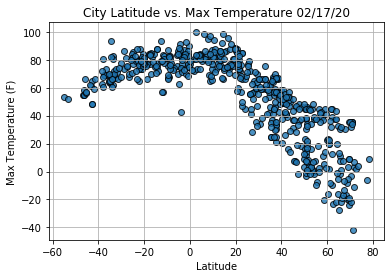

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

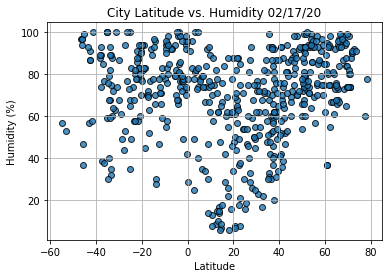

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

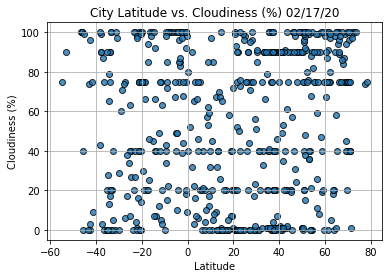

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

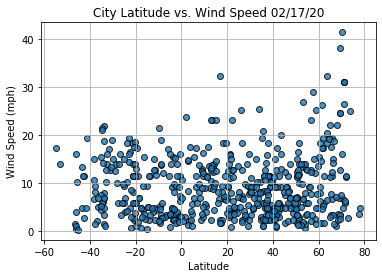

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()